<a href="https://colab.research.google.com/github/natdebandi/migmobs_exploratory/blob/main/Migracion_MIGMOBS_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MIGMOBS LATAM

Exploración de datos migratorios

**Natalia Dedandi**



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Stock migratorio en ARGENTINA Y CHILE



## Flujos migratorios hacia ARGENTINA Y CHILE

Source 1: Global_Transnational_Mobility_dataset v2 (2025)

Abel, Guy (2019). Bilateral international migration flow estimates for 200 countries. figshare. Collection. https://doi.org/10.6084/m9.figshare.c.4470464




In [2]:
# prompt: open a csv file forma drive folder

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Replace 'your_file_path' with the actual path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/3. Proyectos/MIGMOBS_nat/3_data_repository/GTMD2_Data_MIGMOBS_share.csv'

mobility_df = pd.read_csv(file_path)


Mounted at /content/drive


In [3]:
mobility_df.head()

,code_i,code_j,country_i,country_j,year,iso2code_i,iso2code_j,iso3code_i,iso3code_j,iso3code_ij,...,dgd_polity_i,dgd_polity_j,dgd_sanction_threat,dgd_sanction_imposition,dgd_capital_const_j,dgd_capital_const_i,dgd_agree_fta,dgd_agree_eia,dgd_agree_cu,dgd_agree_pta
0,4,8,Afghanistan,Albania,1995,AF,AL,AFG,ALB,AFGALB,...,0.0,5.0,0.0,0.0,102214.53,NaN,0.0,0.0,0.0,0.0
1,4,8,Afghanistan,Albania,1996,AF,AL,AFG,ALB,AFGALB,...,-7.0,0.0,0.0,0.0,103580.22,NaN,0.0,0.0,0.0,0.0
2,4,8,Afghanistan,Albania,1997,AF,AL,AFG,ALB,AFGALB,...,-7.0,5.0,0.0,0.0,103189.45,NaN,0.0,0.0,0.0,0.0
3,4,8,Afghanistan,Albania,1998,AF,AL,AFG,ALB,AFGALB,...,-7.0,5.0,0.0,0.0,102951.47,NaN,0.0,0.0,0.0,0.0
4,4,8,Afghanistan,Albania,1999,AF,AL,AFG,ALB,AFGALB,...,-7.0,5.0,0.0,0.0,103443.45,NaN,0.0,0.0,0.0,0.0


In [26]:
# Filter for countries CHL and ARG
cuntries_latam = ['CHL', 'ARG','VEN','BOL','PAR','PER','ECU','URY','COL','BRA','SUR']

#target_iso3 country of destiny
countries_target = ['CHL', 'ARG']

#target_iso3 country of origin
countries_origin = ['BOL', 'VEN']

countries_df = mobility_df[mobility_df['iso3code_j'].isin(countries_target)]

latam_df = mobility_df[
    mobility_df['iso3code_j'].isin(cuntries_latam) & mobility_df['iso3code_i'].isin(cuntries_latam)
]

mobility_df['year'] = mobility_df['year'].astype(int)

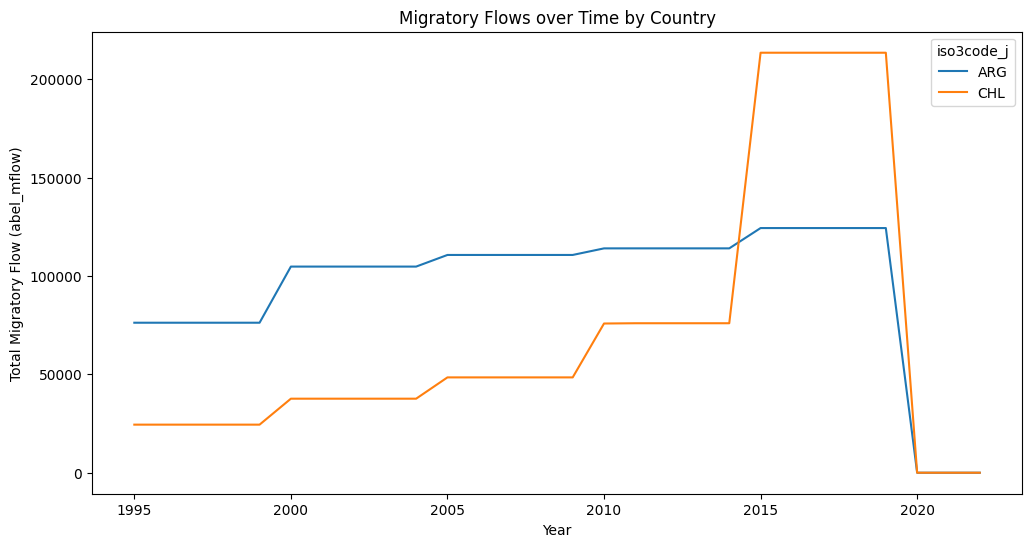

In [27]:
# Group by 'iso3code_j' and 'year', summing 'abel_mflow'
grouped_df = countries_df.groupby(['iso3code_j', 'year'])['abel_mflow'].sum().reset_index()

# Assuming 'year' is a column in your DataFrame
grouped_df['year'] = grouped_df['year'].astype(int)

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='abel_mflow', hue='iso3code_j', data=grouped_df)
plt.title('Migratory Flows over Time by Country')
plt.xlabel('Year')
plt.ylabel('Total Migratory Flow (abel_mflow)')
plt.show()



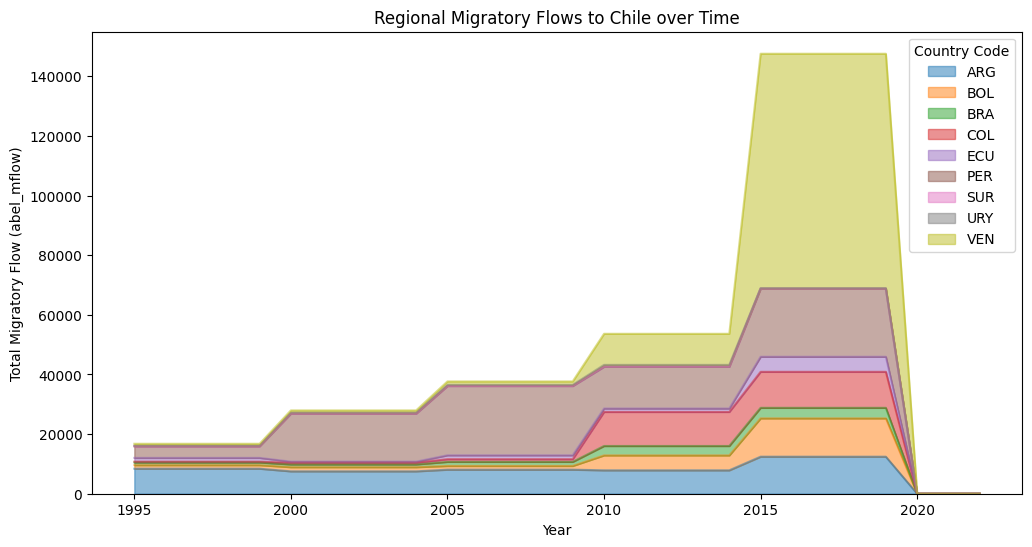

In [30]:
# Filter for country_j = CHL
chl_df = latam_df[latam_df['iso3code_j'] == 'CHL']

# Pivotear los datos para formato wide (necesario para áreas apiladas)
pivot_df = chl_df.pivot(index='year', columns='iso3code_i', values='abel_mflow')

# Gráfico de áreas (no apiladas por defecto)
pivot_df.plot.area(alpha=0.5, figsize=(12, 6))  # alpha controla la transparencia

plt.title('Regional Migratory Flows to Chile over Time')
plt.xlabel('Year')
plt.ylabel('Total Migratory Flow (abel_mflow)')
plt.legend(title='Country Code')
plt.show()


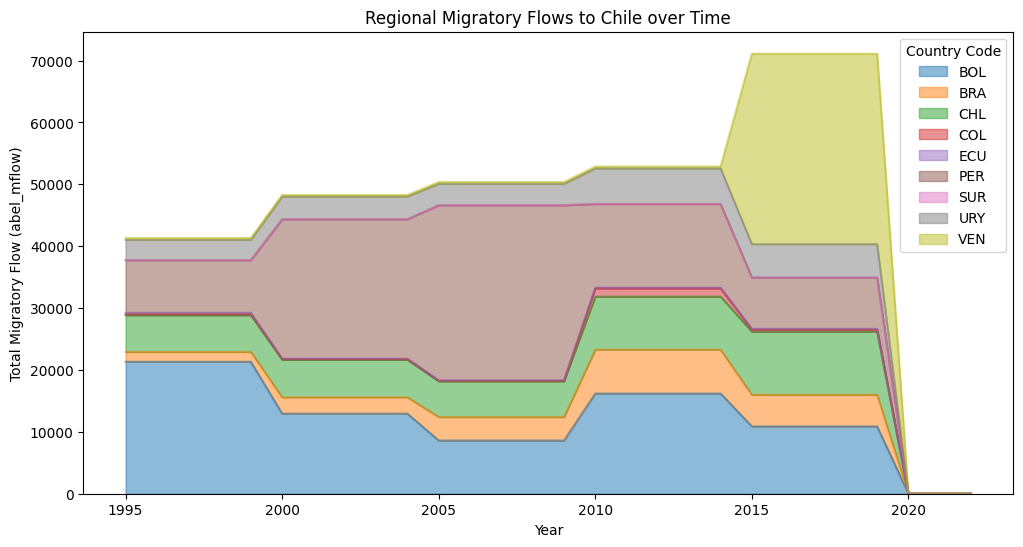

In [31]:
# Filter for country_j = CHL
arg_df = latam_df[latam_df['iso3code_j'] == 'ARG']

# Pivotear los datos para formato wide (necesario para áreas apiladas)
pivot_df = arg_df.pivot(index='year', columns='iso3code_i', values='abel_mflow')

# Gráfico de áreas (no apiladas por defecto)
pivot_df.plot.area(alpha=0.5, figsize=(12, 6))  # alpha controla la transparencia

plt.title('Regional Migratory Flows to Chile over Time')
plt.xlabel('Year')
plt.ylabel('Total Migratory Flow (abel_mflow)')
plt.legend(title='Country Code')
plt.show()

In [32]:
# subset
latam_df_subset = latam_df[['iso3code_j', 'iso3code_i', 'year', 'abel_mflow']]


In [34]:
pip install chord

In [36]:
from chord import Chord

latam_df_subset= latam_df_subset.dropna(subset=['abel_mflow'])
latam_df_subset['abel_mflow'] = latam_df_subset.to_numeric(latam_df_subset['abel_mflow'])

# Filtrar para los años seleccionados
years = [1995, 2010, 2019]
year_dfs = [latam_df_subset[latam_df_subset['year'] == year] for year in years]

AttributeError: 'DataFrame' object has no attribute 'to_numeric'